In [2]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [13]:
"""
Parsing files in order to find necessary data.
"""

data_multi_proc = np.full((3, 8), np.nan)
data_multi_thre = np.full((3, 8), np.nan)

for i, N in enumerate([3, 6, 8]):
    for j, proc_n in enumerate(range(1, 9)):
        this_line_acc = False # The next line will hold the acceleration number.
        found_proc = False    # Is the acceleration number for the multi-proc run was found.
        
        with open("out-{N}-{proc_n}.txt".format(N=N, proc_n=proc_n), "r") as f:
            line = f.readline()
            while line:
                if (this_line_acc):
                    this_line_acc = False
                    acc = float(line)
                    if (not found_proc):
                        data_multi_proc[i][j] = acc
                        found_proc = True
                    else:
                        data_multi_thre[i][j] = acc
                
                if (line.startswith("Acceleration")):
                    this_line_acc = True
                    
                line = f.readline()
                    
print(np.any(np.isnan(data_multi_proc)))
print(np.any(np.isnan(data_multi_thre)))

data_multi_proc

False
False


array([[8.92857e-01, 7.10651e-01, 1.00391e+00, 9.49113e-03, 2.55400e-02,
        9.11369e-03, 1.50852e-01, 4.76410e-03],
       [1.00245e+00, 1.99261e+00, 2.41312e+00, 2.95677e+00, 4.96914e+00,
        6.00945e+00, 6.00308e+00, 4.46012e+00],
       [1.00075e+00, 2.00171e+00, 2.99498e+00, 4.04059e+00, 4.99927e+00,
        5.99886e+00, 6.99683e+00, 7.93295e+00]])

In [26]:
def build_plot(data_for_ns, title):
    """
    Builds plots by given data in form of matrix (3, 8)
    """
    plt.figure(figsize=(14,9))
    plt.title(title)
    plt.xlabel("Number of processes")
    plt.ylabel("Acceleration")

    arguments = range(1, 9) # range for proc_n
    plt.plot(arguments, data_for_ns[0], '-', label='$N = 10^3$', lw=4)
    plt.plot(arguments, data_for_ns[1], '-', label='$N = 10^6$', lw=4)
    plt.plot(arguments, data_for_ns[2], '-', label='$N = 10^8$', lw=4)

    plt.legend()
    plt.grid()
    plt.show()

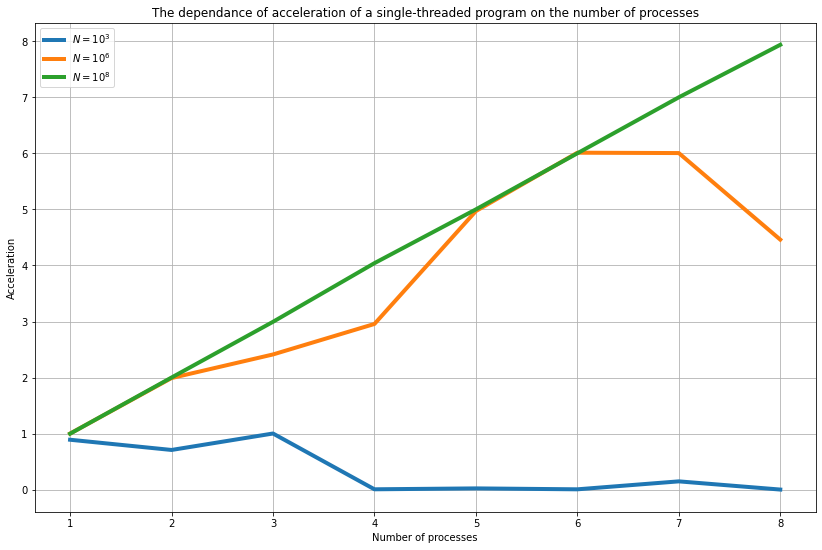

In [27]:
"""
The plot for one process - multi process acceleration.
"""
build_plot(data_multi_proc, "The dependance of acceleration of a single-threaded program on the number of processes")


*Conclusion:* with more partitions for processes to work on the dependance becomes more linear. WIth smaller $N$ the results may even degrade.

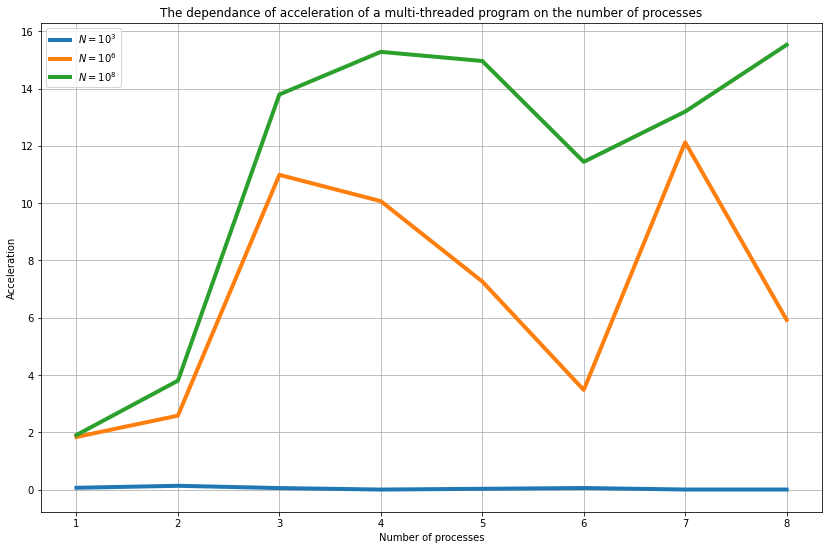

In [28]:
"""
The plot for one process - multi process with threads acceleration.
"""

build_plot(data_multi_thre, "The dependance of acceleration of a multi-threaded program on the number of processes")

*Note:* in this case, $P \cdot T \leq 16$, where $T$ is the number threads, and $P$ is the number of processes.

*Conclusion:* adding threads yields a graph which has a bulge around $P = 4$, which is quite expected considering that the program was run on quad-core computers, and in this case the number of cores would have been equal to the number of threads. 